## Análise de Negócios / Geração de Insights

### Preços de Combustíveis

In [1]:
# Utilizamos a criação da tabela no PostgreSQL

"""
CREATE TABLE anp.preco_combustivel(
		 regiao 		varchar(255)
		,estado 		varchar(255)
		,municipio 		varchar(255)
		,revenda 		varchar(255)
		,cnpj 			varchar(255)
		,nome_rua 		varchar(255)
		,numero_rua 	varchar(255)
		,complemento 	varchar(255)
		,bairro 		varchar(255)
		,cep 			varchar(255)
		,produto 		varchar(255)
		,data_coleta 	date
		,valor_venda 	float
		,unidade_medida varchar(255)
		,bandeira  		varchar(255)
)

"""


'\nCREATE TABLE anp.preco_combustivel(\n\t\t regiao \t\tvarchar(255)\n\t\t,estado \t\tvarchar(255)\n\t\t,municipio \t\tvarchar(255)\n\t\t,revenda \t\tvarchar(255)\n\t\t,cnpj \t\t\tvarchar(255)\n\t\t,nome_rua \t\tvarchar(255)\n\t\t,numero_rua \tvarchar(255)\n\t\t,complemento \tvarchar(255)\n\t\t,bairro \t\tvarchar(255)\n\t\t,cep \t\t\tvarchar(255)\n\t\t,produto \t\tvarchar(255)\n\t\t,data_coleta \tdate\n\t\t,valor_venda \tfloat\n\t\t,unidade_medida varchar(255)\n\t\t,bandeira  \t\tvarchar(255)\n)\n\n'

### Instalando as Bibliotecas

In [1]:
pip install psycopg2


Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import pandas.io.sql as sqlio
import psycopg2 as ps


In [3]:
conn = ps.connect(dbname = 'ANP',
                    user ='postgres',
                    password = 'crf2038',
                    host = 'localhost',
                    port = '5432' )


In [4]:
sql = """
SELECT * FROM anp.preco_combustivel
"""


In [5]:
df = sqlio.read_sql_query(sql, conn)


C:\Users\fabia\AppData\Local\Temp\ipykernel_2424\1825879229.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = sqlio.read_sql_query(sql, conn)


In [6]:
df.head()


,regiao,estado,municipio,revenda,cnpj,nome_rua,numero_rua,complemento,bairro,cep,produto,data_coleta,valor_venda,unidade_medida,bandeira
0,NE,BA,SALVADOR,PETROBRAS DISTRIBUIDORA S.A.,34.274.233/0015-08,RUA EDISTIO PONDE,474,None,STIEP,41770-395,GNV,2018-01-02,2.370,R$ / m³,PETROBRAS DISTRIBUIDORA S.A.
1,NE,BA,SALVADOR,PETROBRAS DISTRIBUIDORA S.A.,34.274.233/0015-08,RUA EDISTIO PONDE,474,None,STIEP,41770-395,DIESEL S10,2018-01-02,3.240,R$ / litro,PETROBRAS DISTRIBUIDORA S.A.
2,NE,BA,SALVADOR,PETROBRAS DISTRIBUIDORA S.A.,34.274.233/0015-08,RUA EDISTIO PONDE,474,None,STIEP,41770-395,ETANOL,2018-01-02,2.930,R$ / litro,PETROBRAS DISTRIBUIDORA S.A.
3,NE,BA,SALVADOR,PETROBRAS DISTRIBUIDORA S.A.,34.274.233/0015-08,RUA EDISTIO PONDE,474,None,STIEP,41770-395,GASOLINA,2018-01-02,3.620,R$ / litro,PETROBRAS DISTRIBUIDORA S.A.
4,S,RS,CANOAS,METROPOLITANO COMERCIO DE COMBUSTIVEIS LTDA,88.587.589/0001-17,AVENIDA GUILHERME SCHELL,6340,None,CENTRO,92310-000,GNV,2018-01-02,2.699,R$ / m³,BRANCA


### Tipos de Colunas

In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4401370 entries, 0 to 4401369
Data columns (total 15 columns):
 #   Column          Dtype  
---  ------          -----  
 0   regiao          object 
 1   estado          object 
 2   municipio       object 
 3   revenda         object 
 4   cnpj            object 
 5   nome_rua        object 
 6   numero_rua      object 
 7   complemento     object 
 8   bairro          object 
 9   cep             object 
 10  produto         object 
 11  data_coleta     object 
 12  valor_venda     float64
 13  unidade_medida  object 
 14  bandeira        object 
dtypes: float64(1), object(14)
memory usage: 503.7+ MB


In [8]:
print(f'Quantidade de linhas e colunas{df.shape}')


Quantidade de linhas e colunas(4401370, 15)


A data de coleta está como object e deve estar como Date

In [20]:
df['data_coleta'] = pd.to_datetime(df['data_coleta'])


In [21]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4401370 entries, 0 to 4401369
Data columns (total 15 columns):
 #   Column          Dtype         
---  ------          -----         
 0   regiao          object        
 1   estado          object        
 2   municipio       object        
 3   revenda         object        
 4   cnpj            object        
 5   nome_rua        object        
 6   numero_rua      object        
 7   complemento     object        
 8   bairro          object        
 9   cep             object        
 10  produto         object        
 11  data_coleta     datetime64[ns]
 12  valor_venda     float64       
 13  unidade_medida  object        
 14  bandeira        object        
dtypes: datetime64[ns](1), float64(1), object(13)
memory usage: 503.7+ MB


### Verificando se há Nulos na base

In [22]:
df.isnull().sum()


regiao                  0
estado                  0
municipio               0
revenda                 0
cnpj                    0
nome_rua                0
numero_rua           2775
complemento       3354329
bairro              13416
cep                     0
produto                 0
data_coleta             0
valor_venda             0
unidade_medida          0
bandeira                0
dtype: int64

### Selecionando as colunas que vamos trabalhar

Obs: Não podemos fazer um drop NA, pois isso excluiria todas a linha e não somente os dados que estão nulos. Por exemplo: Se droparmos o número de rua, perderíamos todos os postos que não tem os números de rua preenchido.


In [23]:
df_anp = df[['data_coleta','regiao','estado','municipio','bandeira','produto','valor_venda']]


In [24]:
df_anp.head()


,data_coleta,regiao,estado,municipio,bandeira,produto,valor_venda
0,2018-01-02,NE,BA,SALVADOR,PETROBRAS DISTRIBUIDORA S.A.,GNV,2.370
1,2018-01-02,NE,BA,SALVADOR,PETROBRAS DISTRIBUIDORA S.A.,DIESEL S10,3.240
2,2018-01-02,NE,BA,SALVADOR,PETROBRAS DISTRIBUIDORA S.A.,ETANOL,2.930
3,2018-01-02,NE,BA,SALVADOR,PETROBRAS DISTRIBUIDORA S.A.,GASOLINA,3.620
4,2018-01-02,S,RS,CANOAS,BRANCA,GNV,2.699


### Separando o Ano e Mês

In [ ]:
df_anp['ano'] = df_anp['data_coleta'].dt.year
df_anp['mes'] = df_anp['data_coleta'].dt.month


In [26]:
df_anp.head()


,data_coleta,regiao,estado,municipio,bandeira,produto,valor_venda,ano,mes
0,2018-01-02,NE,BA,SALVADOR,PETROBRAS DISTRIBUIDORA S.A.,GNV,2.370,2018,1
1,2018-01-02,NE,BA,SALVADOR,PETROBRAS DISTRIBUIDORA S.A.,DIESEL S10,3.240,2018,1
2,2018-01-02,NE,BA,SALVADOR,PETROBRAS DISTRIBUIDORA S.A.,ETANOL,2.930,2018,1
3,2018-01-02,NE,BA,SALVADOR,PETROBRAS DISTRIBUIDORA S.A.,GASOLINA,3.620,2018,1
4,2018-01-02,S,RS,CANOAS,BRANCA,GNV,2.699,2018,1


### Estatística Básica

In [27]:
df_anp.describe().round(2)
# round = trazer os valores de venda no formato de 2 casas


,data_coleta,valor_venda,ano,mes
count,4401370,4401370.00,4401370.00,4401370.00
mean,2020-05-29 04:40:07.617629440,4.48,2019.93,6.27
min,2018-01-01 00:00:00,1.76,2018.00,1.00
25%,2019-02-18 00:00:00,3.52,2019.00,3.00
50%,2020-03-25 00:00:00,4.19,2020.00,6.00
75%,2021-10-20 00:00:00,5.20,2021.00,9.00
max,2022-12-30 00:00:00,9.65,2022.00,12.00
std,NaN,1.30,1.45,3.38


### Quais tipos de produtos são comercializados?

### Visualizando Valores Únicos

In [29]:
# Visualizando os valores únicos
print(f'Os produtos comercializados são: {df_anp.produto.unique()}')


Os produtos comercializados são: ['GNV' 'DIESEL S10' 'ETANOL' 'GASOLINA' 'DIESEL' 'GASOLINA ADITIVADA']


### Quais anos estão na Base?

In [30]:
print(f'Os anos da Base são: {df_anp.ano.unique()}')


Os anos da Base são: [2018 2019 2020 2021 2022]


### GroupBy
Descobrindo os valores mínimos, máximos e médios dos produtos por ano

In [32]:
df_anp_valor = df_anp[['ano','produto','valor_venda']]


In [33]:
df_anp_valor.groupby(['produto','ano']).agg(['min','max','mean']).round(2)


valor_venda            
                                min   max  mean
produto            ano                         
DIESEL             2018        2.80  5.20  3.50
                   2019        2.87  4.99  3.60
                   2020        2.45  5.09  3.42
                   2021        3.10  6.99  4.69
                   2022        3.14  9.00  6.63
DIESEL S10         2018        2.84  5.30  3.59
                   2019        2.79  5.09  3.69
                   2020        2.46  5.38  3.51
                   2021        2.80  6.96  4.74
                   2022        3.59  9.65  6.73
ETANOL             2018        1.90  4.98  3.13
                   2019        2.10  5.47  3.17
                   2020        1.80  5.15  3.18
                   2021        2.05  7.90  4.67
                   2022        2.49  7.98  4.85
GASOLINA           2018        3.37  6.29  4.45
                   2019        3.39  6.29  4.42
                   2020        2.87  5.90  4.28
                   2021        3.10  8.00  5.89
                   2022        3.49  8.99  6.32
GASOLINA ADITIVADA 2020        3.69  6.00  4.59
                   2021        3.46  8.99  6.04
                   2022        4.09  9.28  6.47
GNV                2018        1.76  4.10  2.73
                   2019        2.00  4.56  3.22
                   2020        2.00  4.78  3.17
                   2021        2.38  6.70  3.89
                   2022        3.17  7.99  5.04

In [34]:
df_anp_valor_estado = df_anp[['ano','produto', 'estado', 'valor_venda']]


In [37]:
df_anp_valor_estado.head()


,ano,produto,estado,valor_venda
0,2018,GNV,BA,2.370
1,2018,DIESEL S10,BA,3.240
2,2018,ETANOL,BA,2.930
3,2018,GASOLINA,BA,3.620
4,2018,GNV,RS,2.699


In [40]:
df_anp_valor.groupby(['produto','ano']).agg(['min', 'max', 'mean']).round(2)


valor_venda            
                                min   max  mean
produto            ano                         
DIESEL             2018        2.80  5.20  3.50
                   2019        2.87  4.99  3.60
                   2020        2.45  5.09  3.42
                   2021        3.10  6.99  4.69
                   2022        3.14  9.00  6.63
DIESEL S10         2018        2.84  5.30  3.59
                   2019        2.79  5.09  3.69
                   2020        2.46  5.38  3.51
                   2021        2.80  6.96  4.74
                   2022        3.59  9.65  6.73
ETANOL             2018        1.90  4.98  3.13
                   2019        2.10  5.47  3.17
                   2020        1.80  5.15  3.18
                   2021        2.05  7.90  4.67
                   2022        2.49  7.98  4.85
GASOLINA           2018        3.37  6.29  4.45
                   2019        3.39  6.29  4.42
                   2020        2.87  5.90  4.28
                   2021        3.10  8.00  5.89
                   2022        3.49  8.99  6.32
GASOLINA ADITIVADA 2020        3.69  6.00  4.59
                   2021        3.46  8.99  6.04
                   2022        4.09  9.28  6.47
GNV                2018        1.76  4.10  2.73
                   2019        2.00  4.56  3.22
                   2020        2.00  4.78  3.17
                   2021        2.38  6.70  3.89
                   2022        3.17  7.99  5.04

In [41]:
df_anp_valor_estado = df_anp[['ano', 'produto', 'estado','valor_venda']]
df_anp_valor_estado.groupby(['produto','ano','estado']).agg(['min', 'max', 'mean']).round(2)


valor_venda            
                            min   max  mean
produto ano  estado                        
DIESEL  2018 AC            3.38  4.89  4.29
             AL            3.10  4.23  3.60
             AM            3.09  4.49  3.63
             AP            3.29  4.51  3.88
             BA            2.99  5.20  3.51
...                         ...   ...   ...
GNV     2022 RN            4.11  4.99  4.50
             RS            4.59  6.89  5.88
             SC            4.00  6.89  5.50
             SE            4.47  5.49  4.99
             SP            3.59  6.99  5.22

[727 rows x 3 columns]

### Descobrir a quantidade de bandeiras por produto/ano

In [47]:
df_anp_bandeira = df_anp[['ano','bandeira','produto']]


In [48]:
df_anp_bandeira.groupby(['ano','produto']).bandeira.nunique()
# Quantidade de bandeiras - numero único


ano   produto           
2018  DIESEL                64
      DIESEL S10            66
      ETANOL                66
      GASOLINA              66
      GNV                   24
2019  DIESEL                59
      DIESEL S10            61
      ETANOL                63
      GASOLINA              64
      GNV                   22
2020  DIESEL                52
      DIESEL S10            57
      ETANOL                58
      GASOLINA              58
      GASOLINA ADITIVADA    43
      GNV                   23
2021  DIESEL                54
      DIESEL S10            54
      ETANOL                55
      GASOLINA              55
      GASOLINA ADITIVADA    54
      GNV                   22
2022  DIESEL                51
      DIESEL S10            60
      ETANOL                60
      GASOLINA              60
      GASOLINA ADITIVADA    58
      GNV                   24
Name: bandeira, dtype: int64

In [49]:
df_anp_bandeira.head()


,ano,bandeira,produto
0,2018,PETROBRAS DISTRIBUIDORA S.A.,GNV
1,2018,PETROBRAS DISTRIBUIDORA S.A.,DIESEL S10
2,2018,PETROBRAS DISTRIBUIDORA S.A.,ETANOL
3,2018,PETROBRAS DISTRIBUIDORA S.A.,GASOLINA
4,2018,BRANCA,GNV


In [57]:
df_anp_bandeira_estado = df_anp[['ano','bandeira','produto','estado']]


In [56]:
df_anp_bandeira_estado.groupby(['ano','produto','estado']).bandeira.nunique()


ano   produto  estado
2018  DIESEL   AC         6
               AL         7
               AM         9
               AP         3
               BA        10
                         ..
2022  GNV      RN         5
               RS         6
               SC         8
               SE         5
               SP         7
Name: bandeira, Length: 727, dtype: int64

## Gráficos

In [58]:
#graficos
import matplotlib.pyplot as plt
import seaborn as sns


In [59]:
df_anp.head()


,data_coleta,regiao,estado,municipio,bandeira,produto,valor_venda,ano,mes
0,2018-01-02,NE,BA,SALVADOR,PETROBRAS DISTRIBUIDORA S.A.,GNV,2.370,2018,1
1,2018-01-02,NE,BA,SALVADOR,PETROBRAS DISTRIBUIDORA S.A.,DIESEL S10,3.240,2018,1
2,2018-01-02,NE,BA,SALVADOR,PETROBRAS DISTRIBUIDORA S.A.,ETANOL,2.930,2018,1
3,2018-01-02,NE,BA,SALVADOR,PETROBRAS DISTRIBUIDORA S.A.,GASOLINA,3.620,2018,1
4,2018-01-02,S,RS,CANOAS,BRANCA,GNV,2.699,2018,1


In [60]:
df_anp['produto'].unique()


array(['GNV', 'DIESEL S10', 'ETANOL', 'GASOLINA', 'DIESEL',
       'GASOLINA ADITIVADA'], dtype=object)

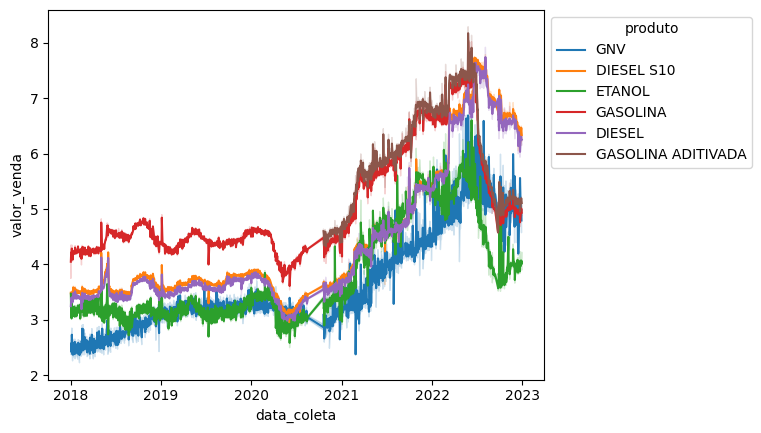

In [61]:
ax = sns.lineplot(data = df_anp, x="data_coleta", y ='valor_venda',   hue="produto")
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
# hue = separa por alguma categoria, no caso produto


### Separando o Dataset para entender um pouquinho melhor a nossa base

In [62]:
#Separando o dataset
gasolina_aditivada = df_anp.loc[df['produto']=='GASOLINA ADITIVADA']
gasolina = df_anp.loc[df['produto']=='GASOLINA']
diesel_s10 = df_anp.loc[df['produto']=='DIESEL S10']
diesel = df_anp.loc[df['produto']=='DIESEL']
etanol = df_anp.loc[df['produto']=='ETANOL']
gnv = df_anp.loc[df['produto']=='GNV']


### Criando funções que auxiliam a plotar gráficos


In [75]:
def plotar_boxplot_2V(titulo, labelx, labely, x, y, dataset):
    sns.set_style('darkgrid')
    ax = sns.boxplot(x=x, y=y, data=dataset, hue=x, palette='Set1', legend=False)
    ax.figure.set_size_inches(12,6)
    ax.set_title(titulo, loc='left', fontsize=18)
    ax.set_xlabel(labelx, fontsize=14)
    ax.set_ylabel(labely, fontsize=14)



In [64]:
# bloxplot Generalista
def plotar_boxplot_geral(y, dataset):
    ax = sns.boxplot(y=y, data=dataset)
    ax.figure.set_size_inches(4,4)


### Analisando os combustíveis

Gasolina Aditivada - 2018/2022

In [69]:
# Estatística básica de cada produto
print('Gasolina Aditivada')
gasolina_aditivada.valor_venda.describe().round(2)


Gasolina Aditivada


count    340489.00
mean          6.19
std           0.94
min           3.46
25%           5.49
50%           6.19
75%           6.92
max           9.28
Name: valor_venda, dtype: float64

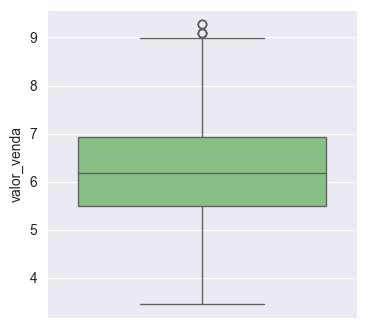

In [70]:
plotar_boxplot_geral('valor_venda', gasolina_aditivada)
# Nas bolinhas, são o outliers


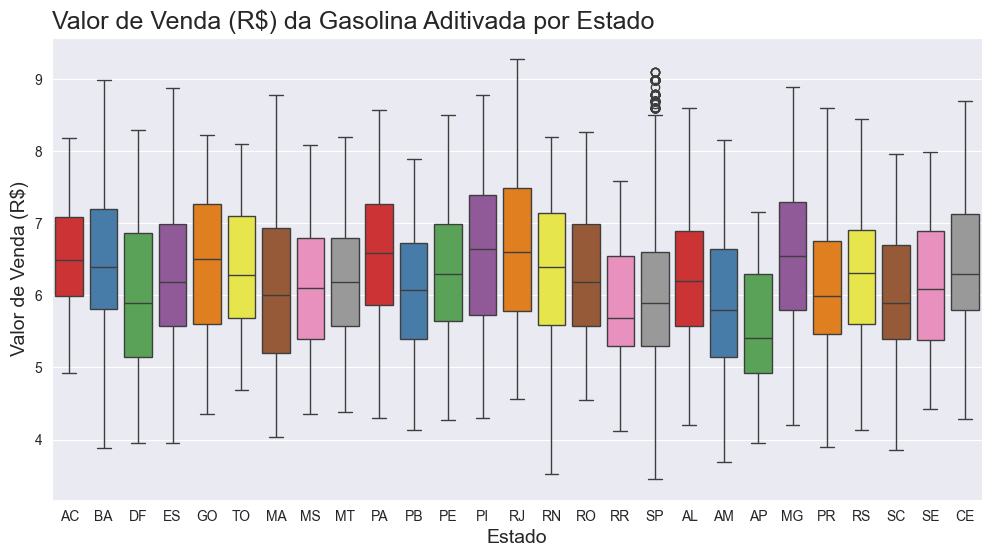

In [76]:
plotar_boxplot_2V('Valor de Venda (R$) da Gasolina Aditivada por Estado',
        'Estado',
        'Valor de Venda (R$)',
        'estado',
        'valor_venda',
        gasolina_aditivada)


### Gasolina Comum

In [77]:
print('Gasolina Comum')
gasolina.valor_venda.describe().round(2)


Gasolina Comum


count    1247070.00
mean           4.99
std            1.01
min            2.87
25%            4.29
50%            4.65
75%            5.50
max            8.99
Name: valor_venda, dtype: float64

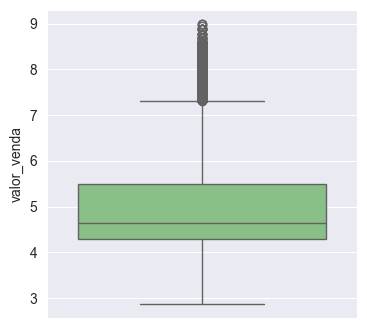

In [78]:
plotar_boxplot_geral('valor_venda', gasolina)


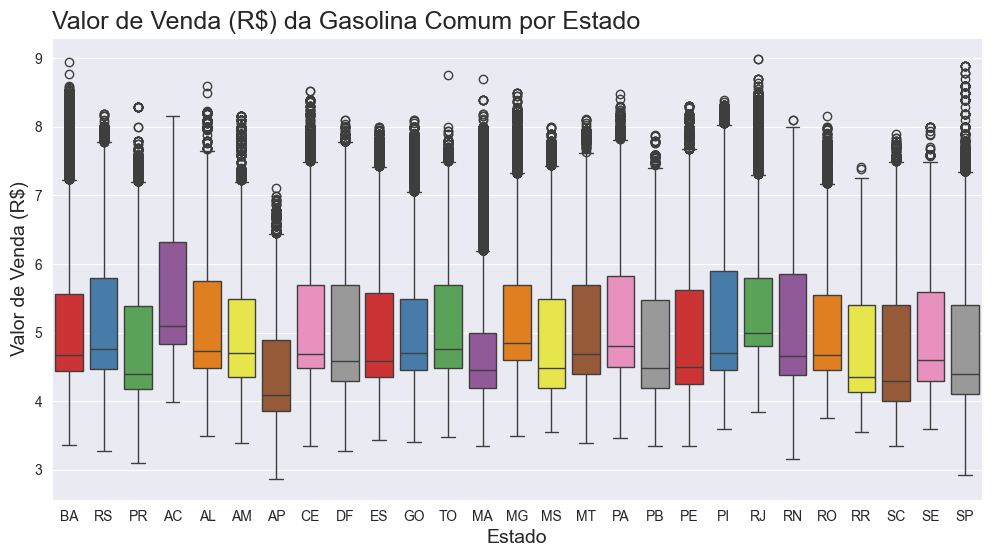

In [79]:
plotar_boxplot_2V('Valor de Venda (R$) da Gasolina Comum por Estado',
        'Estado',
        'Valor de Venda (R$)',
        'estado',
        'valor_venda',
        gasolina)


### Diesel S10

In [80]:
print('Diesel S10')
diesel_s10.valor_venda.describe().round(2)


Diesel S10


count    1008641.00
mean           4.37
std            1.27
min            2.46
25%            3.52
50%            3.80
75%            4.80
max            9.65
Name: valor_venda, dtype: float64

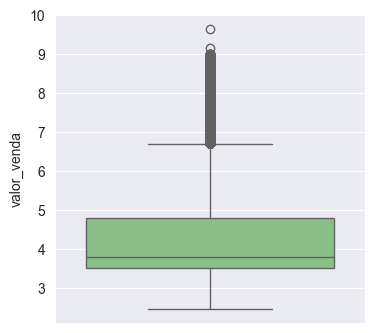

In [81]:
plotar_boxplot_geral('valor_venda', diesel_s10)


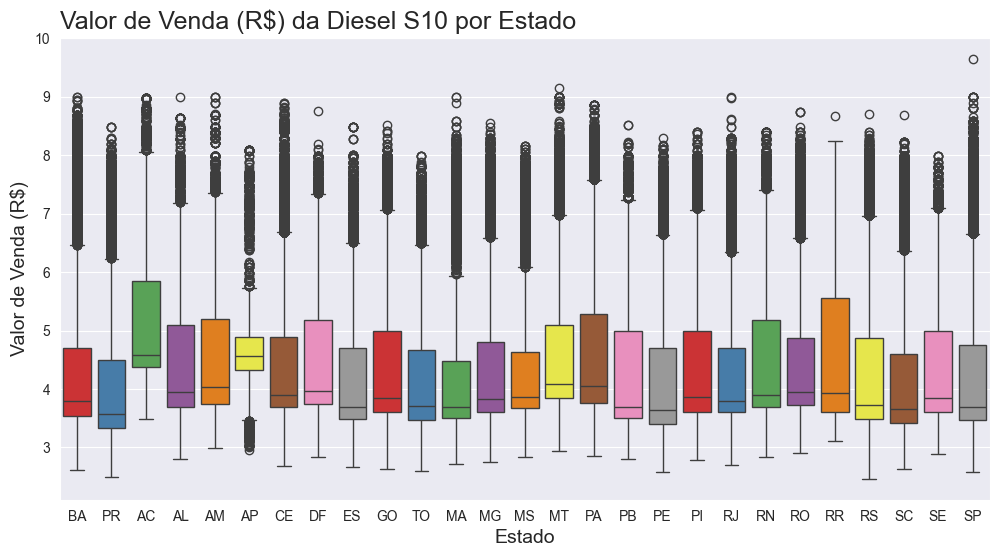

In [82]:
plotar_boxplot_2V('Valor de Venda (R$) da Diesel S10 por Estado',
        'Estado',
        'Valor de Venda (R$)',
        'estado',
        'valor_venda',
        diesel_s10)


In [83]:
#Separando o dataset
gasolina_aditivada = df_anp.loc[df['produto']=='GASOLINA ADITIVADA']
gasolina = df_anp.loc[df['produto']=='GASOLINA']
diesel_s10 = df_anp.loc[df['produto']=='DIESEL S10']
diesel = df_anp.loc[df['produto']=='DIESEL']
etanol = df_anp.loc[df['produto']=='ETANOL']
gnv = df_anp.loc[df['produto']=='GNV']


### Diesel

In [86]:
print('Diesel')
diesel.valor_venda.describe().round(2)


Diesel


count    623737.00
mean          4.20
std           1.23
min           2.45
25%           3.40
50%           3.68
75%           4.52
max           9.00
Name: valor_venda, dtype: float64

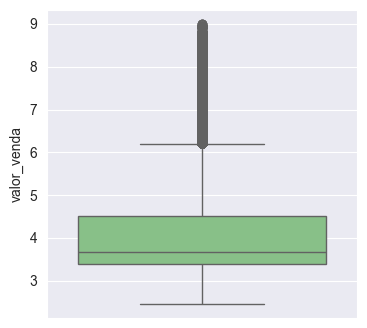

In [85]:
plotar_boxplot_geral('valor_venda', diesel)


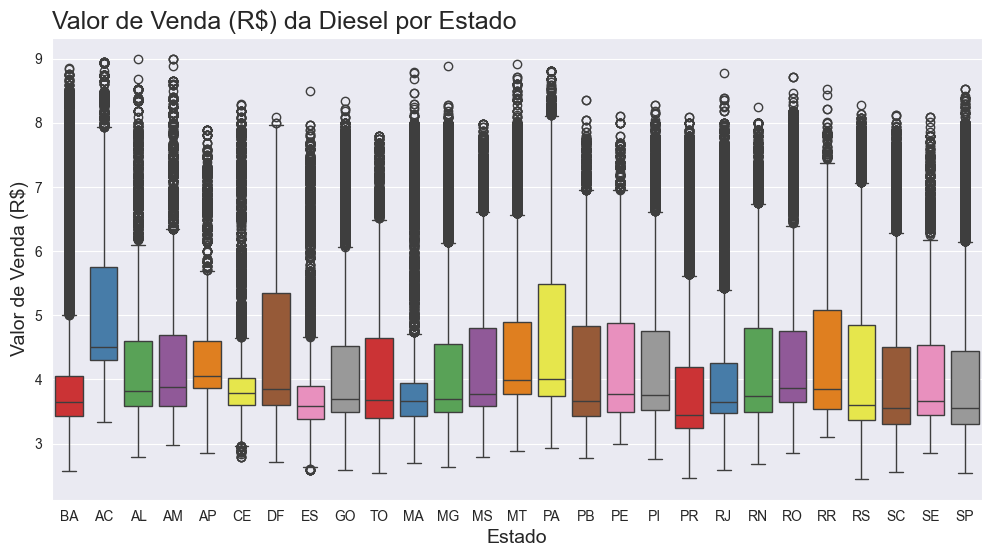

In [87]:
plotar_boxplot_2V('Valor de Venda (R$) da Diesel por Estado',
        'Estado',
        'Valor de Venda (R$)',
        'estado',
        'valor_venda',
        diesel)


### Quantidade de Bandeiras distribuidoras de combustível

In [88]:
df_anp.head()


,data_coleta,regiao,estado,municipio,bandeira,produto,valor_venda,ano,mes
0,2018-01-02,NE,BA,SALVADOR,PETROBRAS DISTRIBUIDORA S.A.,GNV,2.370,2018,1
1,2018-01-02,NE,BA,SALVADOR,PETROBRAS DISTRIBUIDORA S.A.,DIESEL S10,3.240,2018,1
2,2018-01-02,NE,BA,SALVADOR,PETROBRAS DISTRIBUIDORA S.A.,ETANOL,2.930,2018,1
3,2018-01-02,NE,BA,SALVADOR,PETROBRAS DISTRIBUIDORA S.A.,GASOLINA,3.620,2018,1
4,2018-01-02,S,RS,CANOAS,BRANCA,GNV,2.699,2018,1


In [89]:
df_anp['bandeira'].nunique()



85

In [90]:
df_anp['bandeira'].unique()


array(['PETROBRAS DISTRIBUIDORA S.A.', 'BRANCA', 'RODOIL', 'EQUADOR',
       'SABBÁ', 'IPIRANGA', 'RAIZEN', "ATEM' S", 'PETROSERRA', 'ALESAT',
       'HORA', 'PETROBAHIA', 'SP', 'SETTA DISTRIBUIDORA', 'DISLUB',
       'ATLÂNTICA', 'ZEMA', 'RIO BRANCO', 'TDC DISTRIBUIDORA', 'SATELITE',
       'CIAPETRO', 'ALE COMBUSTÍVEIS', 'TAURUS', 'IDAZA', 'PODIUM',
       'WATT', 'SIMARELLI', 'FEDERAL', 'STANG', 'UNI', 'POTENCIAL',
       'CHARRUA', 'MEGAPETRO', 'AMERICANOIL', 'RAIZEN MIME', 'REJAILE',
       'MAXSUL', 'DIBRAPE', 'RUFF C.J.', 'D`MAIS', 'RM PETROLEO',
       'ROYAL FIC', 'TORRAO', 'RZD DISTRIBUIDORA', 'TEMAPE', 'ACOL',
       'MONTEPETRO', 'FAN', 'TOBRAS', 'PETROX DISTRIBUIDORA', 'PETROX',
       'SOLL', 'PETROLUZ', 'LIQUIGÁS', 'POLIPETRO', 'SUL COMBUSTÍVEIS',
       'PELIKANO', 'SMALL', 'DINAMO', 'BREMEN', 'LARCO',
       'MASUT DISTRIBUIDORA', 'ESTRADA', 'WALENDOWSKY', 'GRAN PETRO',
       'SAARA', 'GP', 'REDE SOL', 'AIR BP', '76 OIL', 'TOTAL BRASIL',
       'PR DISTRIBUIDORA', 'TA

In [91]:
bandeiras_estado = df_anp_bandeira_estado.groupby('estado').bandeira.nunique().reset_index()


C:\Users\fabia\AppData\Local\Temp\ipykernel_2424\4016443533.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='estado', y='bandeira', data=bandeiras_estado, palette='pastel')


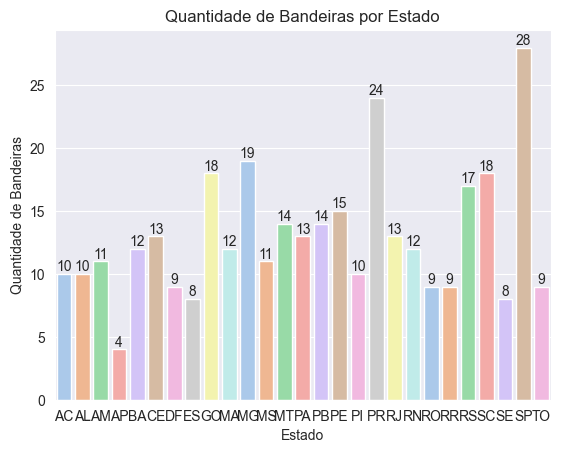

In [94]:
sns.barplot(x='estado', y='bandeira', data=bandeiras_estado, palette='pastel')

plt.title('Quantidade de Bandeiras por Estado')
plt.xlabel('Estado')
plt.ylabel('Quantidade de Bandeiras')

# Adiciona os rótulos de valor em cima de cada barra
for index, row in bandeiras_estado.iterrows():
    plt.annotate(row['bandeira'], xy=(index, row['bandeira']), ha='center', va='bottom')

plt.show()
